# **Importing Required Libraries**

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns


1. pandas adalah pustaka yang digunakan untuk manipulasi dan analisis data.

2. DecisionTreeClassifier adalah kelas dari modul sklearn.tree yang digunakan untuk membangun model klasifikasi pohon keputusan.

3. train_test_split adalah fungsi dari modul sklearn.model_selection yang digunakan untuk membagi dataset menjadi set pelatihan dan pengujian.

4. metrics adalah modul dari pustaka sklearn yang menyediakan berbagai metrik untuk mengevaluasi kinerja model pembelajaran mesin.

# **Loading Data**

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)


Kode ini membuat daftar nama kolom yang disebut col_names, yang akan digunakan untuk memberi label pada kolom-kolom dalam sebuah dataset. Kemudian, kode tersebut memuat dataset bernama "diabetes.csv" ke dalam sebuah DataFrame Pandas yang disebut pima. Argumen header=None menunjukkan bahwa dataset tersebut tidak memiliki baris header, dan argumen names=col_names menetapkan nama kolom dari daftar col_names ke dalam DataFrame.

Jumlah total dataset: 768


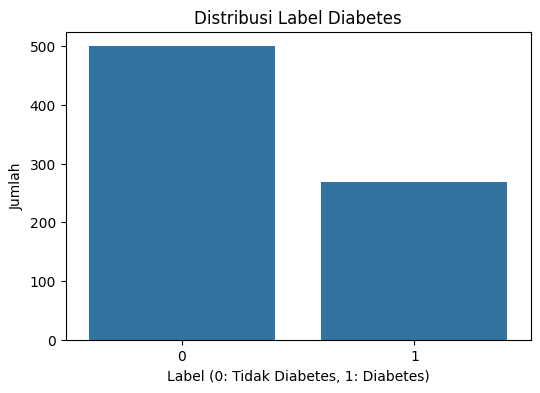

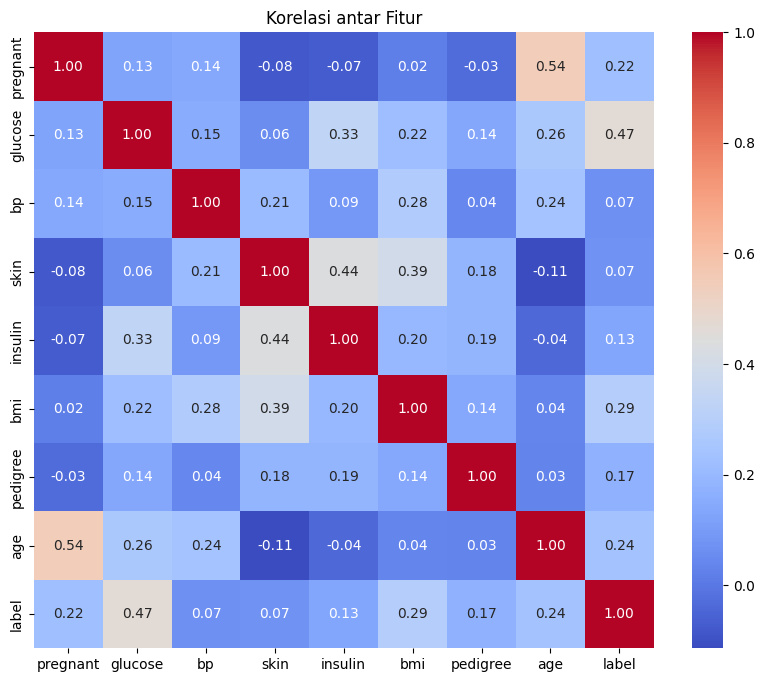

In [5]:


# Menampilkan jumlah total dataset
print("Jumlah total dataset:", len(pima))

# Visualisasi distribusi label (diabetes atau tidak)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=pima)
plt.title('Distribusi Label Diabetes')
plt.xlabel('Label (0: Tidak Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi korelasi antar fitur
correlation_matrix = pima.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Fitur')
plt.show()

In [6]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Fungsi pima.head() digunakan untuk menampilkan beberapa baris pertama dari dataset pima. Ini berguna untuk mendapatkan gambaran cepat tentang data dan memeriksa apakah data telah dimuat dengan benar. Secara default, fungsi head() menampilkan 5 baris pertama dari dataset.

# **Feature Selection**

In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


1. Baris pertama mendefinisikan daftar kolom fitur yang akan digunakan untuk membuat matriks fitur. Daftar ini berisi nama-nama kolom yang akan digunakan sebagai fitur, yaitu 'pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', dan 'pedigree'.

2. Baris kedua membuat matriks fitur X dengan memilih kolom-kolom yang ditentukan dalam daftar feature_cols dari dataset pima. Matriks fitur X akan berisi nilai-nilai dari kolom yang dipilih untuk setiap pengamatan dalam dataset.

3. Baris ketiga membuat variabel target y dengan memilih kolom 'label' dari dataset pima. Variabel target y akan berisi nilai-nilai dari kolom 'label' untuk setiap pengamatan dalam dataset.

Secara keseluruhan, kode ini digunakan untuk mempersiapkan data untuk pembelajaran mesin dengan memisahkan fitur dan variabel target ke dalam variabel yang terpisah.

# **Splitting Data**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


1. Kode ini menggunakan fungsi train_test_split dari modul sklearn.model_selection untuk membagi sebuah dataset menjadi set pelatihan dan set pengujian.

2. Variabel X dan y mewakili fitur dan variabel target dari dataset, masing-masing. Parameter test_size diatur ke 0.3, yang berarti 30% dari data akan digunakan untuk pengujian dan 70% akan digunakan untuk pelatihan. Parameter random_state diatur ke 1, yang memastikan bahwa pemisahan acak yang sama dihasilkan setiap kali kode dijalankan.

3. Fungsi ini mengembalikan empat array: X_train, X_test, y_train, dan y_test. X_train dan y_train mewakili set pelatihan, sedangkan X_test dan y_test mewakili set pengujian. Array-array ini dapat digunakan untuk melatih dan mengevaluasi model pembelajaran mesin.

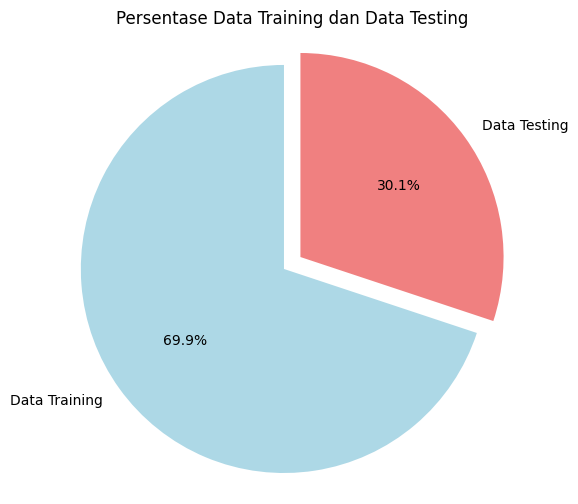

In [10]:

# # **Splitting Data**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Visualisasi persentase data training dan data test
labels = ['Data Training', 'Data Testing']
sizes = [len(X_train), len(X_test)]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the 1st slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Data Training dan Data Testing')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Jumlah data training: 537
Jumlah data testing: 231


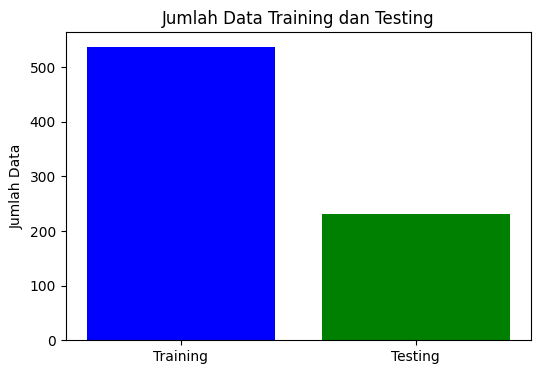

In [9]:
# prompt: BUATLAH CODE MENAMPILKAN JUMLAH DATA TRAINIG DAN JUMLAH DATA TEST DAN LAKUKAN VISUALISASI

# Menampilkan jumlah data training dan testing
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

# Visualisasi jumlah data training dan testing
plt.figure(figsize=(6, 4))
data = [len(X_train), len(X_test)]
labels = ['Training', 'Testing']
plt.bar(labels, data, color=['blue', 'green'])
plt.title('Jumlah Data Training dan Testing')
plt.ylabel('Jumlah Data')
plt.show()

# **Building Decision Tree Model**

In [11]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


# **Evaluating the Model**

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.683982683982684


Fungsi metrics.accuracy_score() digunakan untuk menghitung akurasi dari model klasifikasi. Fungsi ini mengambil dua argumen: y_test dan y_pred. y_test adalah label sebenarnya dari set uji, dan y_pred adalah label yang diprediksi dari set uji.

Fungsi print() digunakan untuk menampilkan skor akurasi di konsol. Outputnya akan berupa string yang mengatakan "Akurasi:" diikuti oleh skor akurasi yang sebenarnya.

mendapatkan tingkat klasifikasi sebesar 67,53%, yang dianggap sebagai akurasi yang baik.meningkatkan akurasi ini dengan menyetel parameter dalam algoritma pohon keputusan.

# **Visualizing Decision Trees**

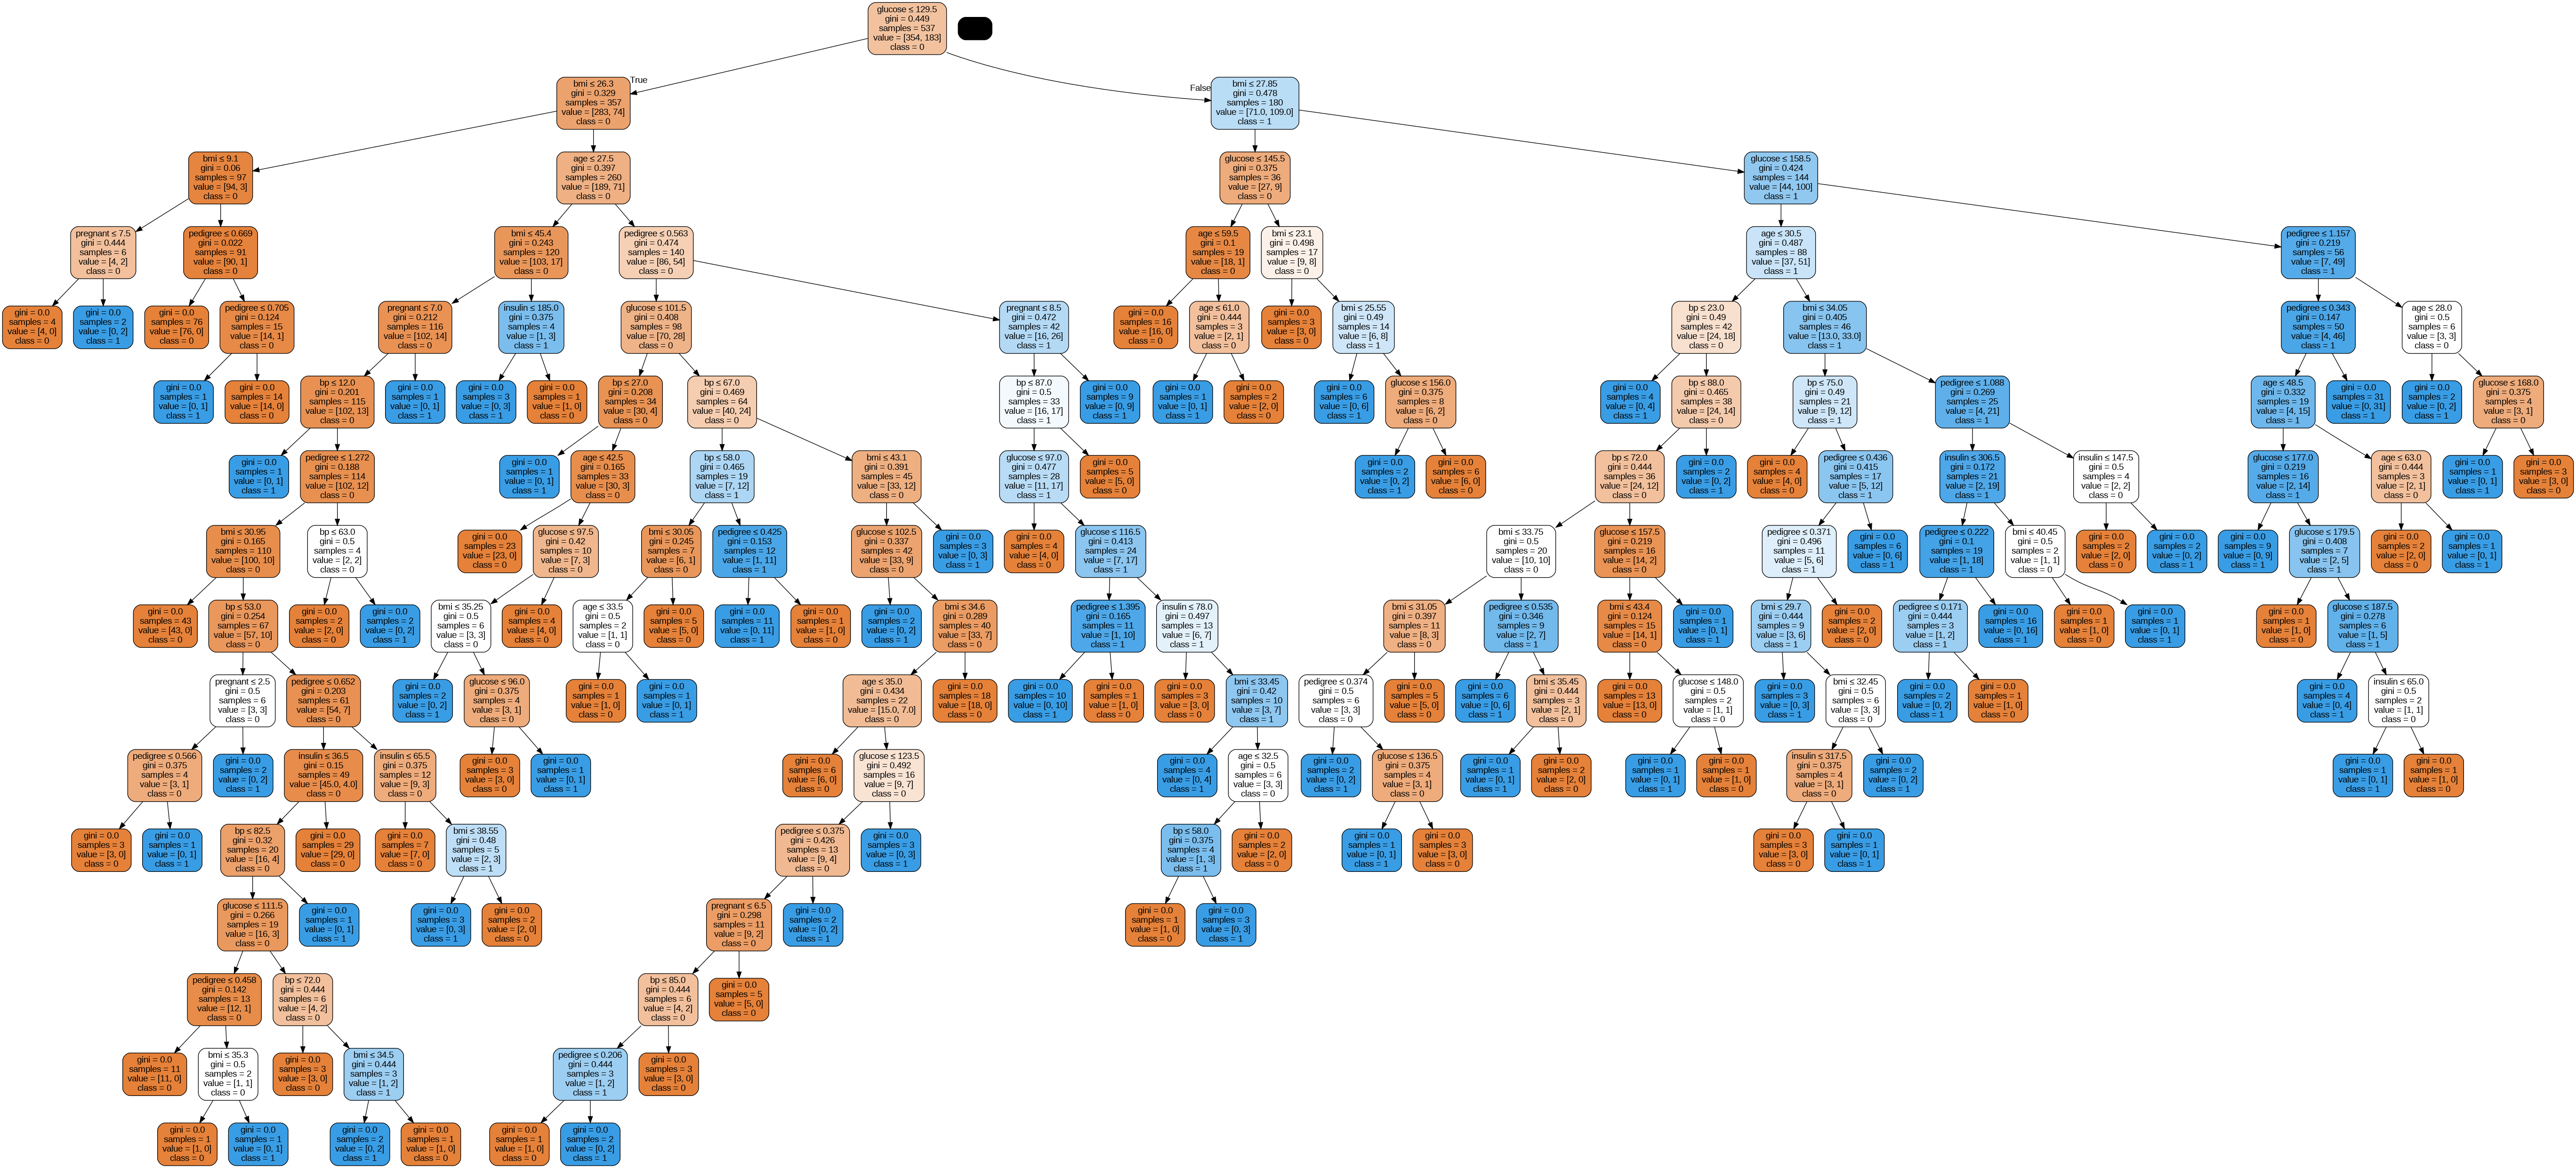

In [13]:
from sklearn.tree import export_graphviz
from io import StringIO  # Import StringIO from io instead of sklearn.externals.six
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Pertama, pustaka yang diperlukan diimpor: export_graphviz dari sklearn.tree, StringIO dari sklearn.externals.six, Image dari IPython.display, dan pydotplus.

Kemudian, objek StringIO dibuat untuk menyimpan data dot yang dihasilkan oleh export_graphviz. Fungsi export_graphviz dipanggil dengan objek clf sebagai argumen pertama dan berbagai parameter untuk menyesuaikan tampilan pohon. Data dot kemudian ditulis ke objek StringIO.

Selanjutnya, pydotplus digunakan untuk membuat grafik dari data dot yang disimpan dalam objek StringIO. Grafik yang dihasilkan disimpan sebagai file PNG bernama "diabetes.png". Akhirnya, grafik ditampilkan menggunakan Image dari IPython.display.

Secara keseluruhan, kode ini menghasilkan representasi visual dari model pohon keputusan, yang dapat berguna untuk memahami bagaimana model membuat prediksi dan mengidentifikasi area yang perlu diperbaiki.

# **Optimizing Decision Tree Performance**

criterion: opsional (default = "gini") atau Pilih ukuran pemilihan atribut. Parameter ini memungkinkan kita menggunakan ukuran pemilihan atribut yang berbeda. Kriteria yang didukung adalah "gini" untuk indeks Gini dan "entropy" untuk informasi gain.

splitter: string, opsional (default = "best") atau Strategi Pemisahan. Parameter ini memungkinkan kita memilih strategi pemisahan. Strategi yang didukung adalah "best" untuk memilih pemisahan terbaik dan "random" untuk memilih pemisahan acak terbaik.

max_depth: int atau None, opsional (default = None) atau Kedalaman Maksimum Pohon. Kedalaman maksimum dari pohon. Jika None, maka simpul akan diperluas hingga semua daun mengandung kurang dari min_samples_split sampel. Nilai kedalaman maksimum yang lebih tinggi menyebabkan overfitting, sedangkan nilai yang lebih rendah menyebabkan underfitting (Sumber).

Dalam Scikit-learn, optimasi klasifier Decision Tree dilakukan hanya dengan pre-pruning. Kedalaman maksimum pohon dapat digunakan sebagai variabel kontrol untuk pre-pruning. Dalam contoh berikut, Anda dapat memplot pohon keputusan pada data yang sama dengan max_depth=3. Selain parameter pre-pruning, Anda juga dapat mencoba ukuran pemilihan atribut lain seperti entropi.

In [14]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


Pertama, kelas DecisionTreeClassifier diimpor dan sebuah objek dari kelas ini dibuat dengan kriteria diatur ke "entropy" dan kedalaman maksimum pohon diatur ke 3.

Selanjutnya, metode fit() dipanggil pada objek klasifier dengan data pelatihan (X_train dan y_train) sebagai argumen. Ini melatih pohon keputusan pada data yang diberikan.

Setelah pelatihan, metode predict() dipanggil pada objek klasifier dengan data uji (X_test) sebagai argumen. Ini menghasilkan prediksi untuk data uji berdasarkan pohon keputusan yang telah dilatih.

Akhirnya, akurasi dari klasifier dihitung menggunakan metode accuracy_score() dari modul metrics dan dicetak ke konsol. Ini memberikan indikasi seberapa baik pohon keputusan dapat mengklasifikasikan data uji.

Tingkat klasifikasi meningkat menjadi 77,05%, yang merupakan akurasi yang lebih baik dibandingkan dengan model sebelumnya.

# **Visualizing Decision Trees**

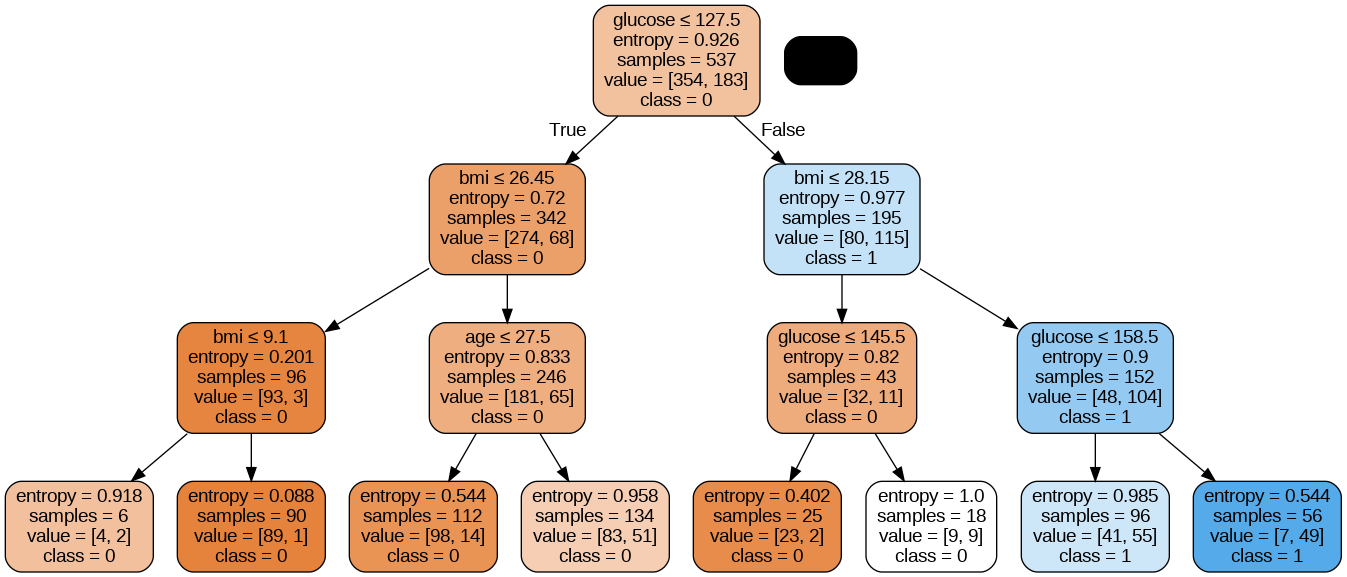

In [15]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Fitur yang digunakan:

1. glucose: Kadar gula darah
2. bmi: Indeks massa tubuh
3. age: Usia
4. Prediktor pertama:  Decision Trees pertama-tama memeriksa kadar gula darah (glucose). Jika kadar gula darah kurang dari atau sama dengan 127.5, maka orang tersebut diklasifikasikan sebagai tidak memiliki diabetes (class = 0). Jika kadar gula darah lebih dari 127.5, maka  Decision Trees akan memeriksa fitur lainnya.

Cabang Decision Trees:

1. Cabang pertama: Jika kadar gula darah lebih dari 127.5,  Decision Trees akan memeriksa indeks massa tubuh (bmi). Jika bmi kurang dari atau sama dengan 28.15, maka orang tersebut diklasifikasikan sebagai memiliki diabetes (class = 1). Jika bmi lebih dari 28.15, maka  Decision Trees akan memeriksa fitur lainnya.
2. Cabang kedua: Jika bmi kurang dari atau sama dengan 26.45,  Decision Trees akan memeriksa usia (age). Jika usia kurang dari atau sama dengan 27.5, maka orang tersebut diklasifikasikan sebagai tidak memiliki diabetes (class = 0). Jika usia lebih dari 27.5, maka  Decision Trees akan memeriksa fitur lainnya.
3. Cabang ketiga: Jika kadar gula darah lebih dari 127.5 dan bmi lebih dari 28.15,  Decision Trees akan memeriksa kadar gula darah lagi. Jika kadar gula darah kurang dari atau sama dengan 145.5, maka orang tersebut diklasifikasikan sebagai tidak memiliki diabetes (class = 0). Jika kadar gula darah lebih dari 145.5, maka  Decision Trees akan memeriksa fitur lainnya.
4. Cabang keempat: Jika kadar gula darah lebih dari 127.5 dan bmi lebih dari 28.15,  Decision Trees akan memeriksa kadar gula darah lagi. Jika kadar gula darah kurang dari atau sama dengan 158.5, maka orang tersebut diklasifikasikan sebagai memiliki diabetes (class = 1). Jika kadar gula darah lebih dari 158.5, maka  Decision Trees akan memeriksa fitur lainnya.

Kesimpulan:
 Decision Trees ini menunjukkan bahwa kadar gula darah (glucose) merupakan fitur yang paling penting